In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [2]:
# Step 1: Load the Dataset
df = pd.read_csv("customer_data.csv")


In [3]:
# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

Dataset Shape: (500, 4)
Missing Values: Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates: 0
Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary Statistics:
        Customer ID         Age  Annual Income  Spending Score
count   500.000000  500.000000     500.000000      500.000000
mean    250.500000   44.220000   81494.512000       50.050000
std     144.481833   15.036082   39511.960582       28.935203
min       1.000000   18.000000   15235.000000        1.000000
25%     125.750000   32.000000   44214.250000       25.000000
50%     250.500000   45.000000   82329.500000       49.000000
75%     375.250000   57.000000  116636.000000       74.000000
max     500.000000   69.000000  149828.000000      100.000000


In [4]:
# Step 2: Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income', 'Spending Score']])


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

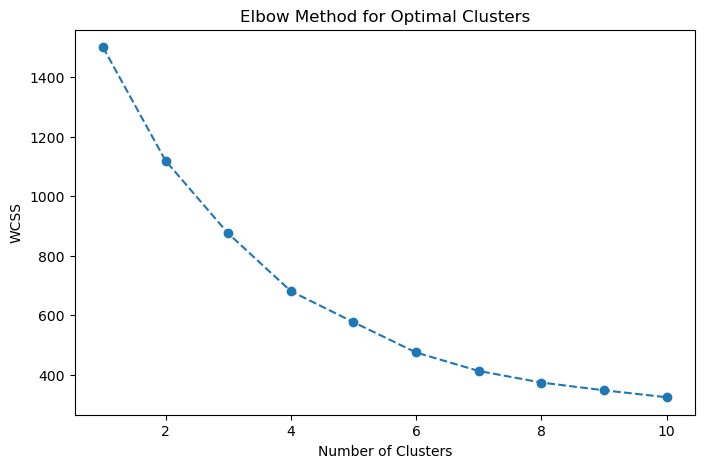

In [9]:
# Step 3: Determine the Optimal Number of Clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [5]:
# Using silhouette score for evaluation
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, cluster_labels)

optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print("Optimal Number of Clusters (Silhouette Score):", optimal_clusters)

Optimal Number of Clusters (Silhouette Score): 6


In [6]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

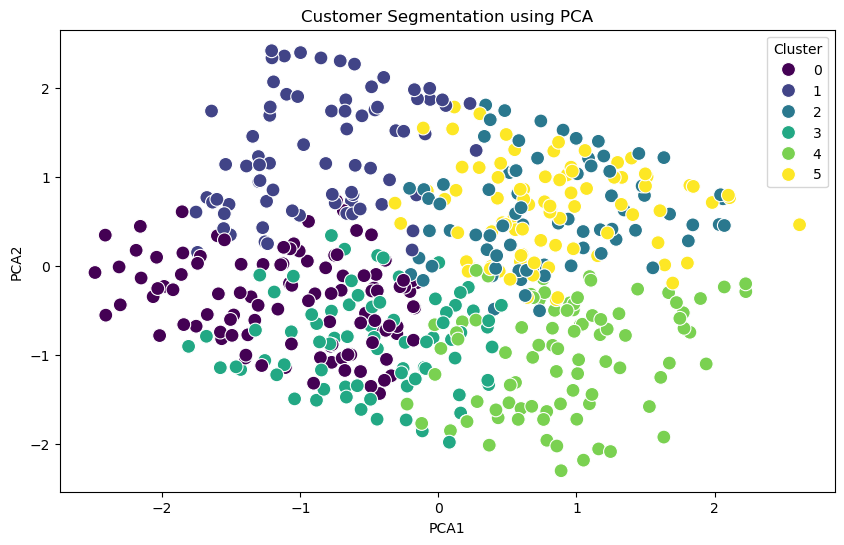

In [7]:
# Step 4: Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation using PCA')
plt.show()


In [8]:
# Save the clustered dataset
df.to_csv("customer_segmented.csv", index=False)